<a href="https://colab.research.google.com/github/mtello5/IS170_Machine_Learning/blob/Text-Mining-%26-Natural-Language-Processing/WordcloudTelloBautista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WorldCloud** - Matthew Tello, David Bautista

In [ ]:
#start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving california_cities.csv to california_cities.csv


In [ ]:
#Load in the dataframe
df = pd.read_csv("california_cities.csv") 

In [ ]:
#Looking at first 5 rows of the dataset
df.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} cities in this dataset such as {}... \n".format(len(df.city.unique()), 
                                                                           ", ".join(df.city.unique()[0:5])))

There are 482 observations and 14 features in this dataset. 

There are 482 cities in this dataset such as Adelanto, AgouraHills, Alameda, Albany, Alhambra... 



In [ ]:
df[["city", "population_total", "area_total_sq_mi"]].head()

,city,population_total,area_total_sq_mi
0,Adelanto,31765,56.027
1,AgouraHills,20330,7.822
2,Alameda,75467,22.960
3,Albany,18969,5.465
4,Alhambra,83089,7.632


In [ ]:
#Groupby by city
city = df.groupby("city")

#Summary statistic of all countries
city.describe().head()

Unnamed: 0                                    latd             \
                 count mean std  min  25%  50%  75%  max count       mean   
city                                                                        
Adelanto           1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0   1.0  34.576111   
AgouraHills        1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   1.0  34.153333   
Alameda            1.0  2.0 NaN  2.0  2.0  2.0  2.0  2.0   1.0  37.756111   
Albany             1.0  3.0 NaN  3.0  3.0  3.0  3.0  3.0   1.0  37.886944   
Alhambra           1.0  4.0 NaN  4.0  4.0  4.0  4.0  4.0   1.0  34.081944   

             ... area_water_km2         area_water_percent                    \
             ...            75%     max              count   mean std    min   
city         ...                                                               
Adelanto     ...          0.046   0.046                1.0   0.03 NaN   0.03   
AgouraHills  ...          0.076   0.076                1.0   0.37 NaN   0.37   
Alameda      ...         31.983  31.983                1.0  53.79 NaN  53.79   
Albany       ...          9.524   9.524                1.0  67.28 NaN  67.28   
Alhambra     ...          0.003   0.003                1.0   0.01 NaN   0.01   

                                         
               25%    50%    75%    max  
city                                     
Adelanto      0.03   0.03   0.03   0.03  
AgouraHills   0.37   0.37   0.37   0.37  
Alameda      53.79  53.79  53.79  53.79  
Albany       67.28  67.28  67.28  67.28  
Alhambra      0.01   0.01   0.01   0.01  

[5 rows x 104 columns]

In [ ]:
city.mean().sort_values(by="population_total", ascending=False).head()

,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
city,,,,,,,,,,,,,
LosAngeles,239.0,34.050000,-118.250000,71.0,2.0,3884307.0,503.000,469.000,34.000,1302.000,1214.000,88.000,6.70
SanDiego,367.0,32.715000,-117.162500,6.0,3.0,1345895.0,372.400,325.190,47.210,964.510,842.230,122.270,12.68
SanJose,375.0,37.333333,-121.900000,26.0,NaN,1000536.0,179.970,176.526,3.439,466.109,457.201,8.908,1.91
SanFrancisco,370.0,37.783333,-122.416667,NaN,52.0,837442.0,231.890,46.870,185.020,NaN,NaN,NaN,80.00
Fresno,150.0,36.750000,-119.766667,NaN,308.0,509039.0,112.308,111.957,0.351,290.877,289.967,0.910,0.31


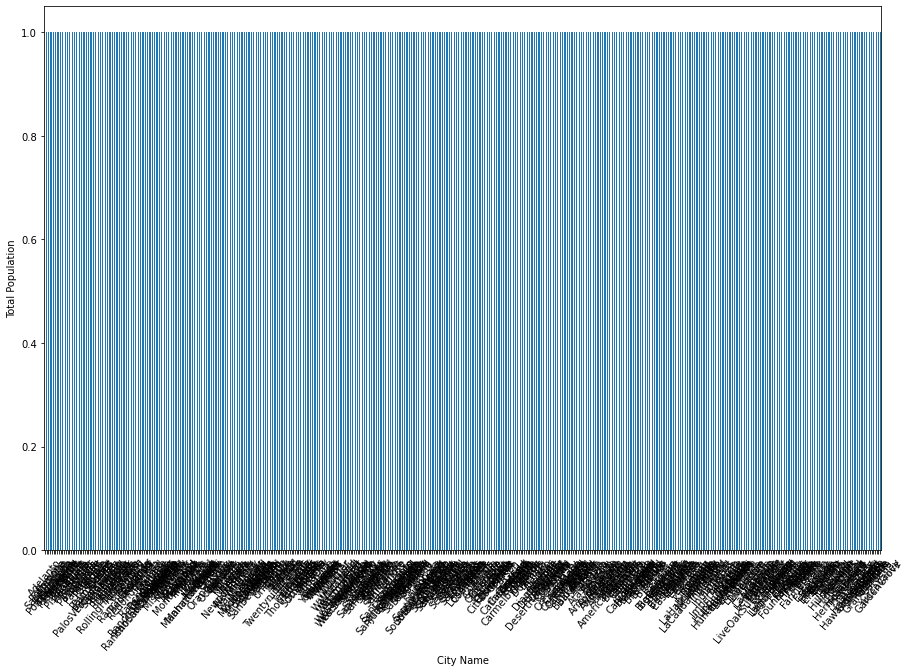

In [ ]:
plt.figure(figsize=(15,10))
city.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("City Name")
plt.ylabel("Total Population")
plt.show()

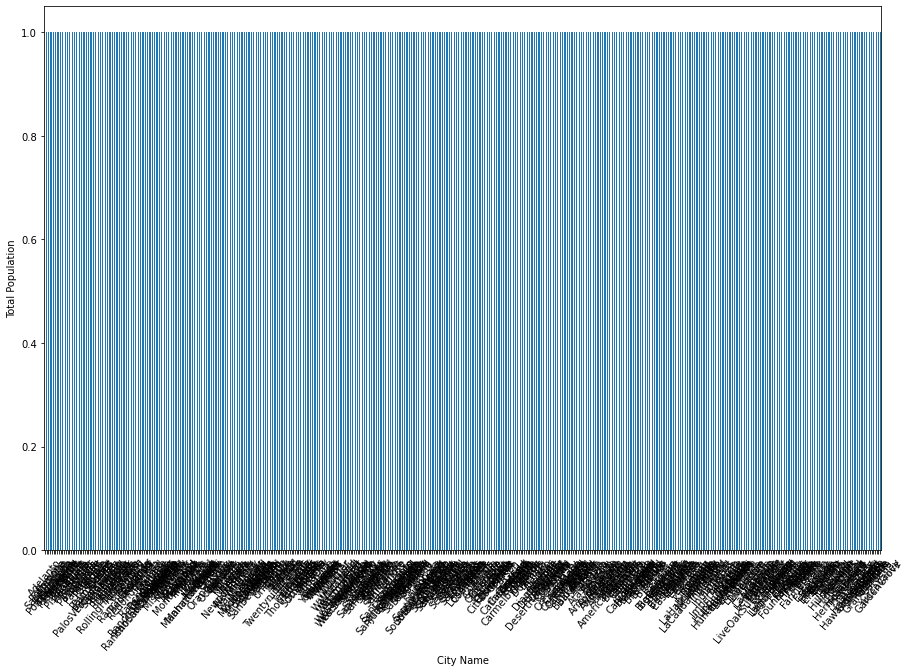

In [ ]:
plt.figure(figsize=(15,10))
city.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("City Name")
plt.ylabel("Total Population")
plt.show()

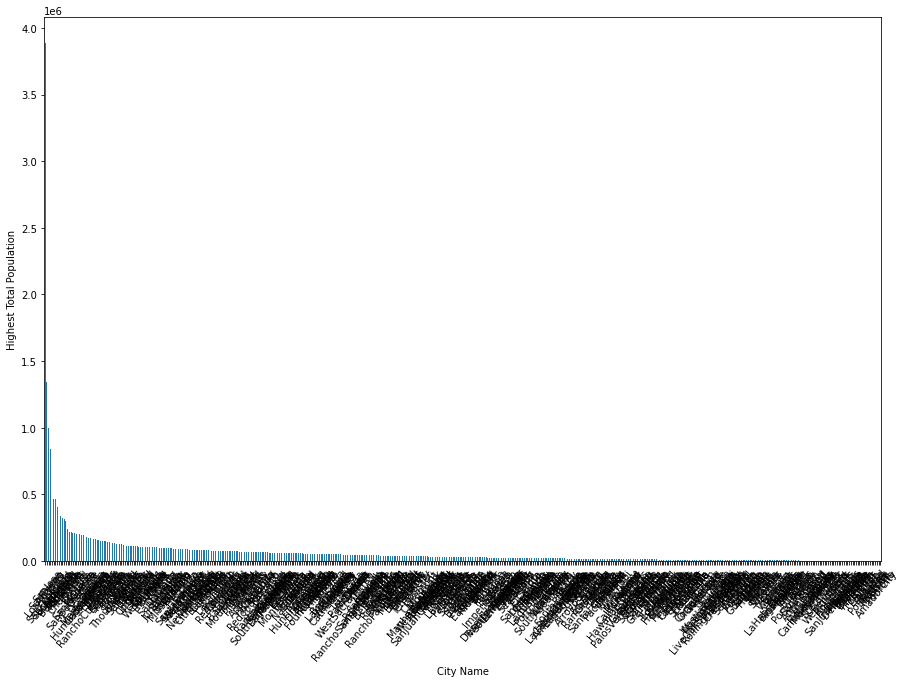

In [ ]:
plt.figure(figsize=(15,10))
city["population_total"].max().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("City Name")
plt.ylabel("Highest Total Population")
plt.show()

In [ ]:
# ?WordCloud


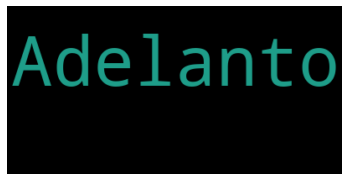

In [ ]:
# Start with one review:
text = df.city[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

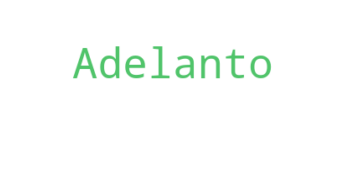

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the graphics/img folder:
wordcloud.to_file("sample_data/first_review.png")

In [ ]:
text = " ".join(review for review in df.city)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 4669 words in the combination of all review.


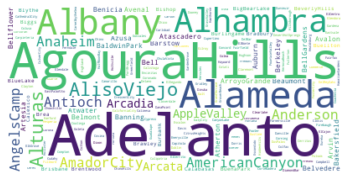

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving california.png to california.png


In [ ]:
california = np.array(Image.open("california.png"))
california

array([[[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       ...,

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [68, 68, 64,  5],
        [68, 68, 64,  3],
        [68, 68, 64,  2]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [68, 68, 64,  3],
        [68, 68, 64,  3],
        [68, 68, 64,  1]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        ...,
        [68, 68, 64,  2],
        [68, 68

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_california = np.ndarray((california.shape[0],california.shape[1])np.int32)

for i in range(len(california)):
    transformed_california[i] = list(map(transform_format, california[i]))

SyntaxError: ignored

In [ ]:
# Check the expected result of your mask
transformed_wine_mask 

NameError: ignored

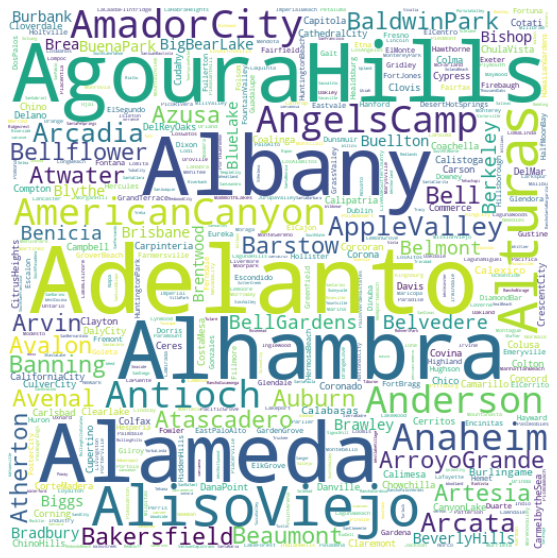

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=california, 
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("california.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# New Section